In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [3]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Text(0.5, 1.0, 'example 22460: class 3')

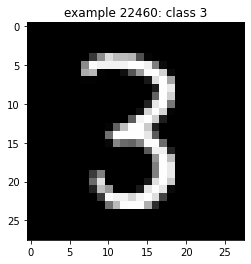

In [5]:
from matplotlib import pyplot as plt
idx=(np.round(np.random.rand()*60000).astype(int))
tlabel=np.argmax(y_train[idx])
plt.imshow(x_train[idx,:,:,:],cmap=plt.get_cmap('Greys_r'))
plt.title("example " + str(idx) + ": class " + str(tlabel))

In [7]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [8]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 11s 24ms/step - loss: 0.3485 - accuracy: 0.8961 - val_loss: 0.0843 - val_accuracy: 0.9780
Epoch 2/5
422/422 [==============================] - 11s 25ms/step - loss: 0.1129 - accuracy: 0.9653 - val_loss: 0.0554 - val_accuracy: 0.9835
Epoch 3/5
422/422 [==============================] - 11s 27ms/step - loss: 0.0858 - accuracy: 0.9740 - val_loss: 0.0487 - val_accuracy: 0.9877
Epoch 4/5
422/422 [==============================] - 12s 28ms/step - loss: 0.0718 - accuracy: 0.9787 - val_loss: 0.0479 - val_accuracy: 0.9848
Epoch 5/5
422/422 [==============================] - 12s 29ms/step - loss: 0.0653 - accuracy: 0.9798 - val_loss: 0.0420 - val_accuracy: 0.9880


In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03957945480942726
Test accuracy: 0.987500011920929
